# Life Expectancy

## 1. Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import matplotlib
np.__version__, pd.__version__

('1.23.5', '1.5.3')

In [ ]:
matplotlib.__version__, sns.__version__

('3.7.1', '0.12.2')

## 2. Load data

In [ ]:
df = pd.read_csv('../data/Life_Expectancy_Data.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# df.shape, df.info(), df.describe(), df.columns, df.dtypes

## 3. EDA

### 3.1 Renaming columns

In [ ]:
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

### 3.2 Univariate Analysis

<Axes: xlabel='status', ylabel='count'>

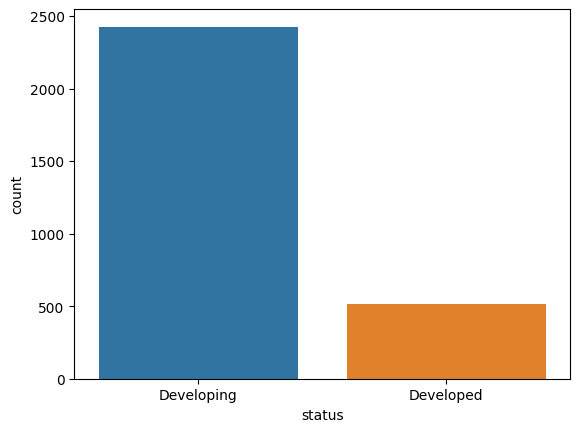

In [ ]:
#countplot
sns.countplot(data = df, x = 'status')

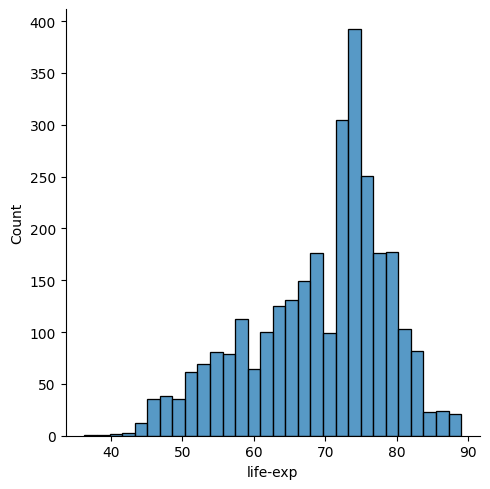

In [ ]:
#distribution plot
sns.displot(data = df, x = 'life-exp')

### 3.3 Multivariate Analysis

#### Easy one

Text(0.5, 0, 'Status')

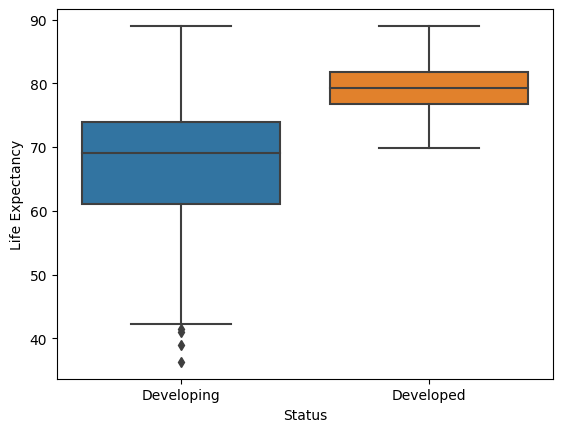

In [ ]:
#boxplot
sns.boxplot(x = df['status'], y=df['life-exp'])
plt.ylabel("Life Expectancy")
plt.xlabel("Status")

<Axes: xlabel='income', ylabel='life-exp'>

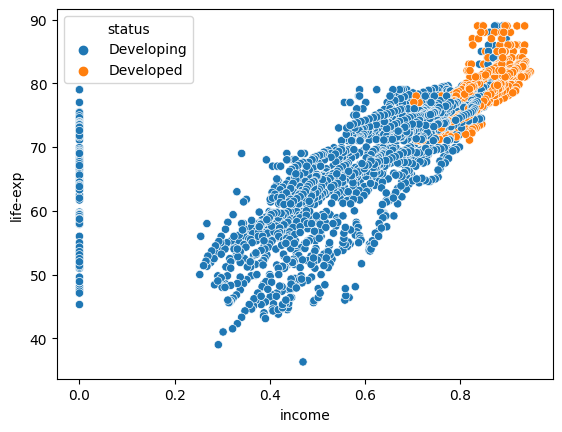

In [ ]:
#scatterplot
sns.scatterplot(x = df['income'], y=df['life-exp'], hue=df['status'])

#### Less Easy One

<Axes: >

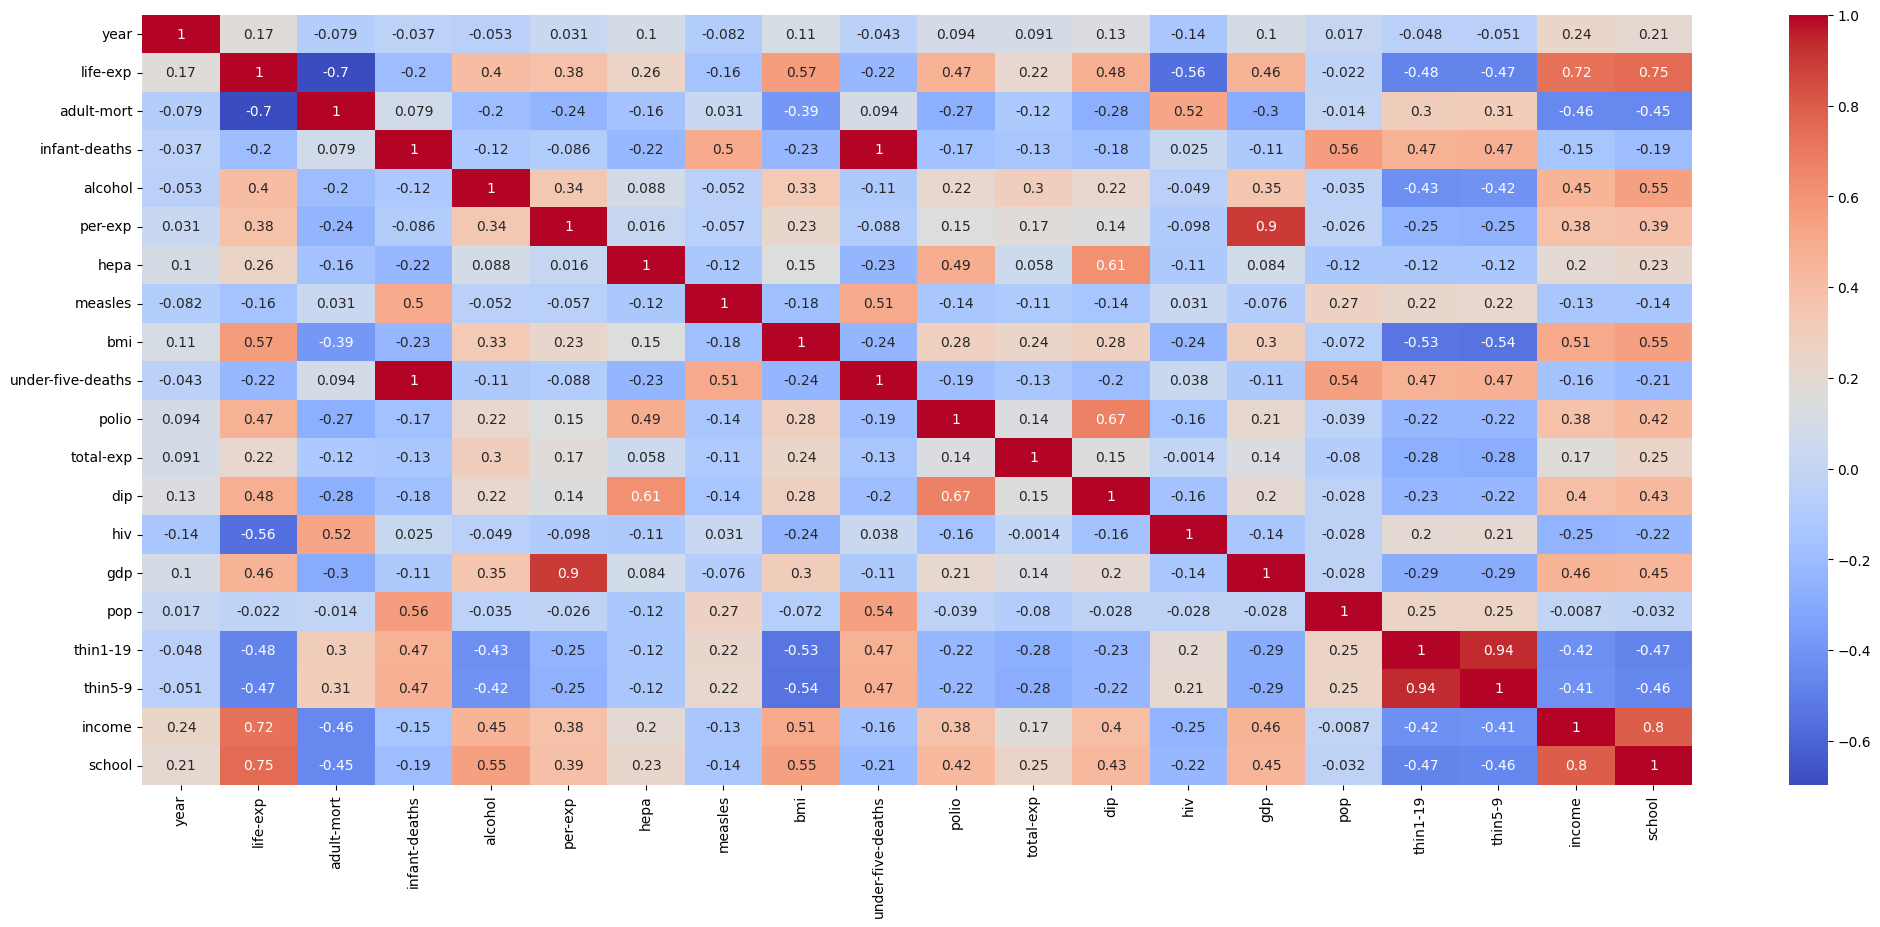

In [ ]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Do some label encoding here first

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])
df["status"].unique()

array([1, 0])

In [ ]:
le.transform(['Developed', 'Developing'])

array([0, 1])

<Axes: >

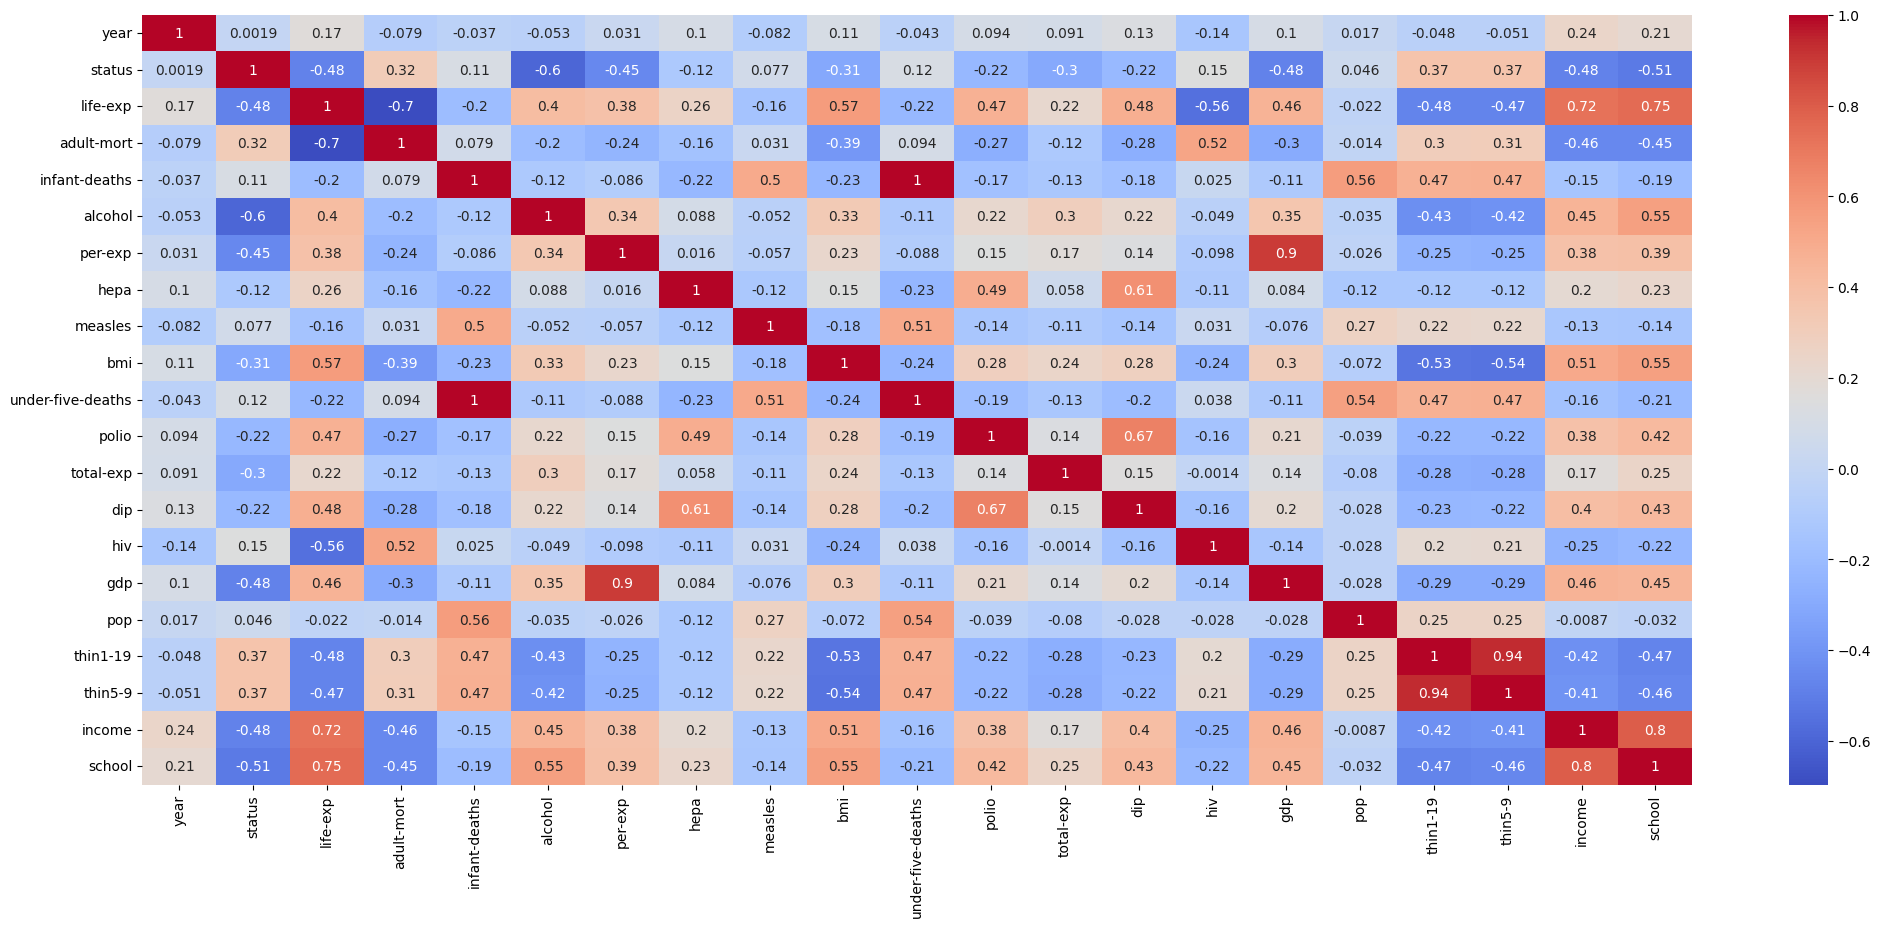

In [ ]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Predictive power score


In [ ]:
import ppscore as pps

In [ ]:
pps.__version__

'1.3.0'

<Axes: xlabel='x', ylabel='y'>

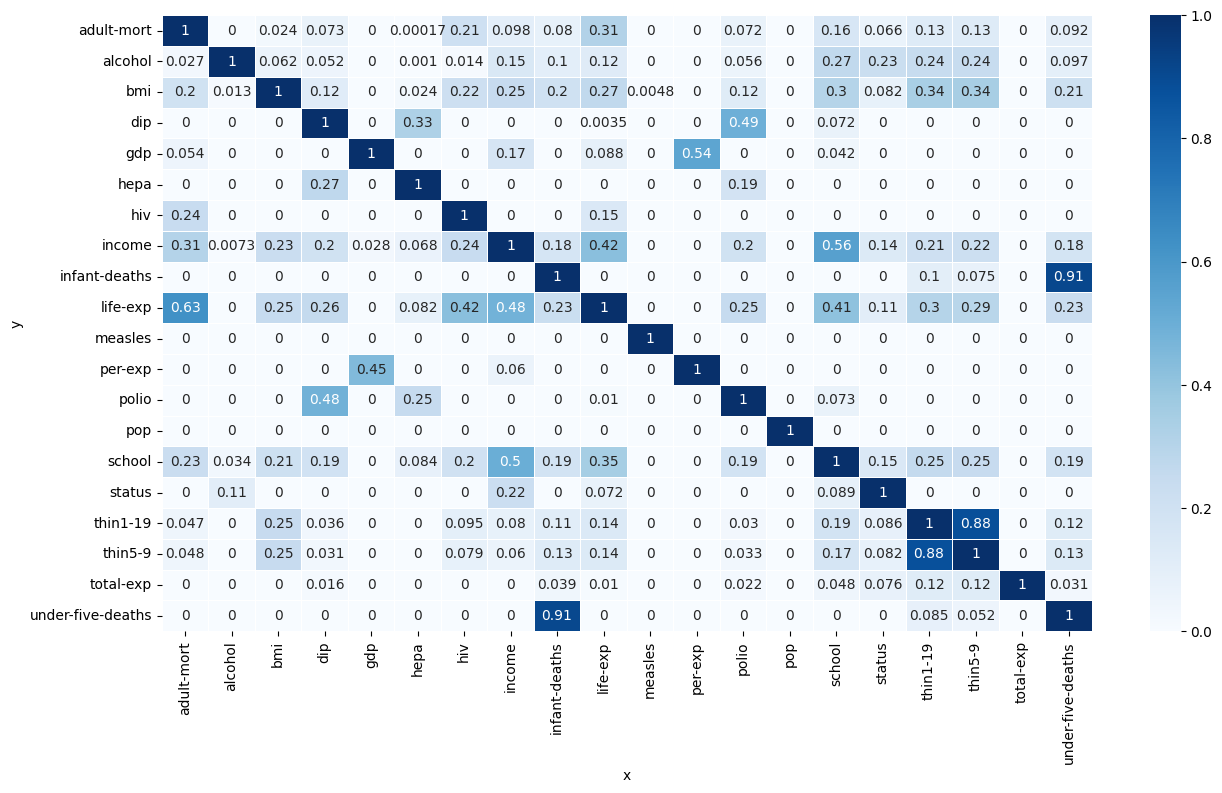

In [ ]:
#just like machine learning

#remove any unnecessary x 
dfcopy = df.copy()
dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#call pps
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering

In [ ]:
## we will not do today, because we will talk about it during PCA or dimensionality reduction

## 5. Feature Selection

In [ ]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [ ]:
# df.info()

In [ ]:
#decide the features
X = df[ ['adult-mort', 'income']  ]
# for sklearn, X should be multi-dimensional (m, n)
# where m is number of samples
# n is number of features, it can be 1

#decide the target
y = df["life-exp"]  
#for sklearn, y should be one-dimensional (m, ) 
# where m is number of samples

In [ ]:
X.shape, y.shape

((2938, 2), (2938,))

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
#train test split

#recall "always split first before preprocessing!"

#why? --> data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((2056, 2), (882, 2))

In [ ]:
y_train.shape, y_test.shape

((2056,), (882,))

## 6. Preprocessing

### Filling missing values

In [ ]:
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)


In [ ]:
X_test['income'].fillna(X_train['income'].median(), inplace=True)
X_test['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)

In [ ]:
mask = y_train.notna()
y_train = y_train[mask]
X_train = X_train[mask]

In [ ]:
mask = y_test.notna()
y_test = y_test[mask]
X_test = X_test[mask]

In [ ]:
assert(X_test.shape[0] == y_test.shape[0])

In [ ]:
assert(X_train.shape[0] == y_train.shape[0])

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  #using the training set distribution to transform X_test

## 7. Model Selection

In [ ]:
### Not so good way - no cross validation
### not recommended

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train) #fit means learn! #later on, you will learn
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))



MSE:  31.419833739402687
r2:  0.6653055824732301


In [ ]:
### cross validation way!!

#step 1. define all the algorithms you wanna compare
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [ ]:
#step 2. cross validate
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")


LinearRegression: Score: [-26.73567747 -31.33704539 -28.81899946 -36.39191961 -25.56691355]; Mean: -29.770111095247692
SVR: Score: [-14.56413024 -11.75317329 -13.53092835 -12.44866589 -11.93510685]; Mean: -12.846400924753755
RandomForestRegressor: Score: [-4.84123813 -6.02663707 -6.62491576 -5.35214138 -6.75309266]; Mean: -5.919605000296295
KNeighborsRegressor: Score: [-6.13333171 -6.77826537 -6.99247707 -6.41944195 -7.01439512]; Mean: -6.66758224390244
DecisionTreeRegressor: Score: [ -9.14844512  -9.64326491  -9.16624255 -10.33410637  -9.51774458]; Mean: -9.561960704607047


In [ ]:
#step 3: grid search
from sklearn.model_selection import GridSearchCV
#Gridsearch is just cross_validation but on one single model

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
              'n_estimators': [5, 6, 7, 8, 9, 10]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}

In [ ]:
best_mse = grid.best_score_

In [ ]:
best_mse

-6.019386930292534

## 8. Testing

In [ ]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

5.726501050338759

In [ ]:
r2_score(y_test, yhat)

0.9389994247135057

## 9. Analysis

In [ ]:
rf = grid.best_estimator_

In [ ]:
rf.feature_importances_

array([0.50273437, 0.49726563])

<BarContainer object of 2 artists>

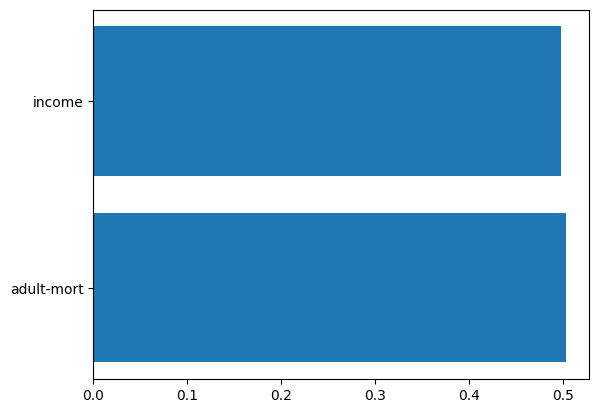

In [ ]:
plt.barh(X.columns, rf.feature_importances_)

## 10. Inference

In [ ]:
#step 1: save your model
import pickle

filename = 'chaky.chakysupermodel'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
#step 2: load your model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#step 3: predict
sample = df[ ['adult-mort', 'income']].loc[13]

In [ ]:
sample

adult-mort    3.000
income        0.341
Name: 13, dtype: float64

In [ ]:
sample_np = np.array([[3.000, 0.341]]) 

In [ ]:
answer = loaded_model.predict(sample_np)

In [ ]:
answer

array([50.76])

In [ ]:
y = df[ ['life-exp']].loc[13]

In [ ]:
y

life-exp    56.2
Name: 13, dtype: float64